In [148]:
import pandas as pd
from prophet import Prophet

In [149]:
#df = pd.read_csv("C:/Users/ASUS/Desktop/Morocco 2023-05-18 to 2024-05-17.csv")
data1 = pd.read_csv("C:/Users/ASUS/Downloads/morocco 2023-01-01 to 2023-05-01.csv")
data2 = pd.read_csv("C:/Users/ASUS/Downloads/morocco 2021-01-01 to 2021-12-31.csv")
data3 = pd.read_csv("C:/Users/ASUS/Downloads/morocco 2022-01-01 to 2022-12-31.csv")

df = pd.concat([data1, data2, data3], axis=0)
df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,morocco,2023-01-01,73.4,50.0,59.6,73.4,49.3,59.6,45.9,63.7,...,8.5,4,10.0,2023-01-01T08:32:56,2023-01-01T18:28:51,0.31,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"60146099999,60120099999,60135099999,F3955,GMME"
1,morocco,2023-01-02,73.4,44.6,56.2,73.4,43.6,56.0,45.0,71.9,...,10.3,5,10.0,2023-01-02T08:33:07,2023-01-02T18:29:37,0.35,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"60146099999,60120099999,60135099999,F3955,GMME"
2,morocco,2023-01-03,66.2,46.4,55.7,66.2,46.4,55.7,53.6,93.3,...,9.3,5,10.0,2023-01-03T08:33:17,2023-01-03T18:30:23,0.38,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"60146099999,60120099999,60135099999,F3955,GMME"
3,morocco,2023-01-04,69.8,42.8,54.5,69.8,42.8,54.5,49.8,87.5,...,9.6,5,10.0,2023-01-04T08:33:25,2023-01-04T18:31:11,0.41,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"60146099999,60120099999,60135099999,F3955,GMME"
4,morocco,2023-01-05,66.2,42.8,53.0,66.2,40.0,52.6,49.3,89.2,...,10.5,5,10.0,2023-01-05T08:33:31,2023-01-05T18:31:59,0.45,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"60146099999,60120099999,60135099999,F3955,GMME"


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 851 entries, 0 to 364
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              851 non-null    object 
 1   datetime          851 non-null    object 
 2   tempmax           851 non-null    float64
 3   tempmin           851 non-null    float64
 4   temp              851 non-null    float64
 5   feelslikemax      851 non-null    float64
 6   feelslikemin      851 non-null    float64
 7   feelslike         851 non-null    float64
 8   dew               851 non-null    float64
 9   humidity          851 non-null    float64
 10  precip            851 non-null    float64
 11  precipprob        851 non-null    int64  
 12  precipcover       851 non-null    float64
 13  preciptype        347 non-null    object 
 14  snow              851 non-null    int64  
 15  snowdepth         851 non-null    int64  
 16  windgust          851 non-null    float64
 1

In [204]:
df_prophet1 = df.loc[:, ['datetime', 'temp']]
df_prophet1 = df_prophet1.rename(columns={'datetime': 'ds', 'temp': 'y'})


In [205]:
df_prophet2= df.loc[:, ['datetime', 'humidity']]
df_prophet2 = df_prophet2.rename(columns={'datetime': 'ds', 'humidity': 'y'})

In [206]:
df_prophet3 = df.loc[:, ['datetime', 'precip']]
df_prophet3 = df_prophet.rename(columns={'datetime': 'ds', 'precip': 'y'})

In [207]:
df_prophet1.dropna(inplace=True)
df_prophet1['ds'] = pd.to_datetime(df_prophet1['ds'])
df_prophet1.head()


,ds,y
0,2023-01-01,59.6
1,2023-01-02,56.2
2,2023-01-03,55.7
3,2023-01-04,54.5
4,2023-01-05,53.0


In [208]:
df_prophet2.dropna(inplace=True)
df_prophet2['ds'] = pd.to_datetime(df_prophet2['ds'])
df_prophet2.head()

,ds,y
0,2023-01-01,63.7
1,2023-01-02,71.9
2,2023-01-03,93.3
3,2023-01-04,87.5
4,2023-01-05,89.2


In [209]:
df_prophet3.dropna(inplace=True)
df_prophet3['ds'] = pd.to_datetime(df_prophet3['ds'])
df_prophet3.head()

,ds,y
0,2023-05-18,17.2
1,2023-05-19,17.1
2,2023-05-20,16.8
3,2023-05-21,17.0
4,2023-05-22,16.5


In [210]:
train_size1 = int(0.85 * len(df_prophet1))
train_data1 = df_prophet1[:train_size]
test_data1 = df_prophet1[train_size:]

In [211]:
train_size2 = int(0.85 * len(df_prophet2))
train_data2 = df_prophet2[:train_size]
test_data2 = df_prophet2[train_size:]

In [212]:
train_size3 = int(0.85 * len(df_prophet3))
train_data3 = df_prophet3[:train_size]
test_data3 = df_prophet3[train_size:]

In [213]:
m1= Prophet()
m1.fit(train_data1)

07:05:19 - cmdstanpy - INFO - Chain [1] start processing
07:05:19 - cmdstanpy - INFO - Chain [1] done processing


In [214]:
m2 = Prophet()
m2.fit(train_data2)

07:05:21 - cmdstanpy - INFO - Chain [1] start processing
07:05:21 - cmdstanpy - INFO - Chain [1] done processing


In [215]:
m3 = Prophet()
m3.fit(train_data3)

07:05:24 - cmdstanpy - INFO - Chain [1] start processing
07:05:24 - cmdstanpy - INFO - Chain [1] done processing


In [216]:
future1 = m1.make_future_dataframe(periods=len(test_data1))
forecast1 = m1.predict(future1)

In [217]:
future2 = m2.make_future_dataframe(periods=len(test_data2))
forecast2 = m2.predict(future2)

In [218]:
future3 = m3.make_future_dataframe(periods=len(test_data3))
forecast3 = m3.predict(future3)

In [227]:
error1 = forecast1.iloc[train_size:]['yhat'] - test_data1['y']
mse1 = (error1 ** 2).mean()
print("MSE = ", mse1)

MSE =  59.55258942711222


In [223]:
forecast1.iloc[train_size:]['yhat']

256    64.762849
257    65.547843
258    65.649037
259    64.934626
260    64.613128
         ...    
846    51.296493
847    50.703192
848    50.570988
849    50.774196
850    50.975200
Name: yhat, Length: 595, dtype: float64

In [225]:
test_data1

,ds,y
135,2021-05-16,65.8
136,2021-05-17,66.0
137,2021-05-18,64.1
138,2021-05-19,64.9
139,2021-05-20,69.4
...,...,...
360,2022-12-27,53.2
361,2022-12-28,50.9
362,2022-12-29,55.6
363,2022-12-30,55.4


In [224]:
forecast2.iloc[train_size:]['yhat']

256    75.840570
257    75.051356
258    75.888287
259    75.841817
260    74.058399
         ...    
846    56.618521
847    56.164233
848    54.290520
849    52.694077
850    51.896112
Name: yhat, Length: 595, dtype: float64

In [226]:
test_data2

,ds,y
135,2021-05-16,80.5
136,2021-05-17,84.8
137,2021-05-18,81.6
138,2021-05-19,81.8
139,2021-05-20,74.0
...,...,...
360,2022-12-27,86.8
361,2022-12-28,90.7
362,2022-12-29,90.4
363,2022-12-30,71.5


In [228]:
error2 = forecast2.iloc[train_size:]['yhat'] - test_data2['y']
mse2 = (error2 ** 2).mean()
print("MSE = ", mse2)

MSE =  211.154143347291


In [229]:
error3 = forecast3.iloc[train_size:]['yhat'] - test_data3['y']
mse3 = (error3 ** 2).mean()
print("MSE = ", mse3)


MSE =  67.03431634808359


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

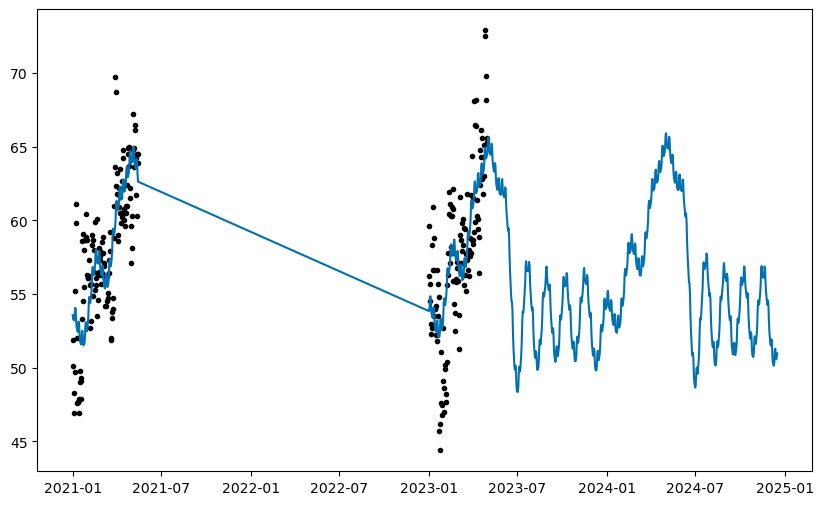

In [230]:
fig1 = m.plot(forecast1)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

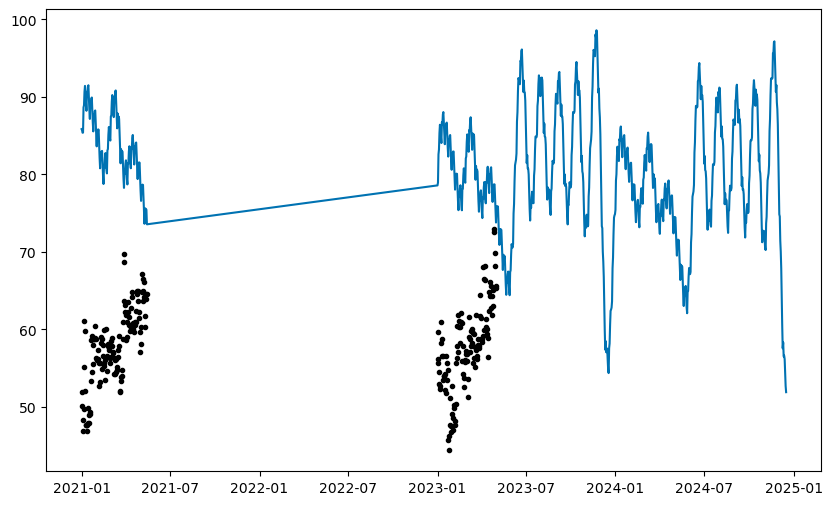

In [231]:
fig2 = m.plot(forecast2)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

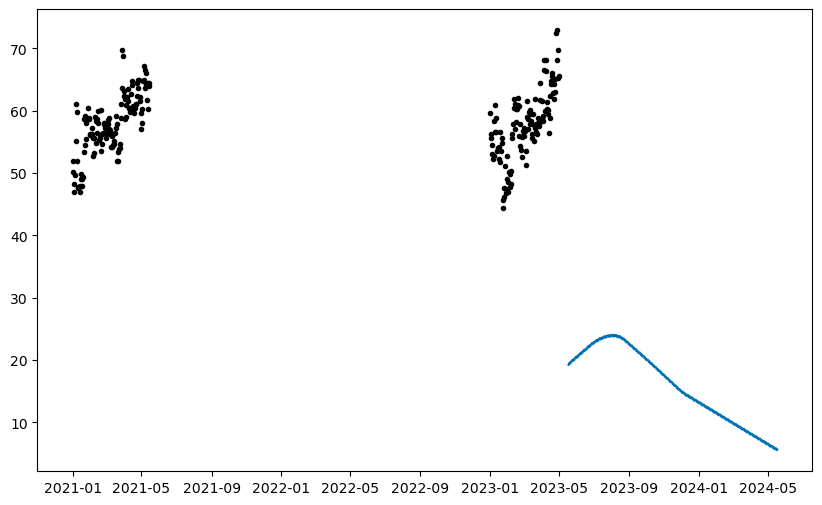

In [232]:
fig3 = m.plot(forecast3)